In [1]:
import yfinance as yf
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = yf.download ('^GDAXI', start='2021-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,13890.219727,13907.129883,13647.790039,13726.740234,13726.740234,70206700
2021-01-05,13680.690430,13768.129883,13566.469727,13651.219727,13651.219727,68899100
2021-01-06,13687.080078,13919.230469,13617.110352,13891.969727,13891.969727,92498800
2021-01-07,13946.530273,14007.469727,13902.240234,13968.240234,13968.240234,86104200
2021-01-08,14106.599609,14131.519531,14007.709961,14049.530273,14049.530273,79821100
...,...,...,...,...,...,...
2021-10-18,15518.589844,15542.169922,15416.019531,15474.469727,15474.469727,49463100
2021-10-19,15510.990234,15527.969727,15457.429688,15515.830078,15515.830078,49579400
2021-10-20,15473.559570,15567.070312,15465.030273,15522.919922,15522.919922,54739200


In [6]:
df ['MA20'] = df [ 'Adj Close'].rolling(20).mean()
df ['MA50'] = df [ 'Adj Close'].rolling(50).mean()

In [7]:
df

,Open,High,Low,Close,Adj Close,Volume,MA20,MA50
Date,,,,,,,,
2021-01-04,13890.219727,13907.129883,13647.790039,13726.740234,13726.740234,70206700,NaN,NaN
2021-01-05,13680.690430,13768.129883,13566.469727,13651.219727,13651.219727,68899100,NaN,NaN
2021-01-06,13687.080078,13919.230469,13617.110352,13891.969727,13891.969727,92498800,NaN,NaN
2021-01-07,13946.530273,14007.469727,13902.240234,13968.240234,13968.240234,86104200,NaN,NaN
2021-01-08,14106.599609,14131.519531,14007.709961,14049.530273,14049.530273,79821100,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-10-18,15518.589844,15542.169922,15416.019531,15474.469727,15474.469727,49463100,15320.856494,15593.647383
2021-10-19,15510.990234,15527.969727,15457.429688,15515.830078,15515.830078,49579400,15329.221484,15588.549785
2021-10-20,15473.559570,15567.070312,15465.030273,15522.919922,15522.919922,54739200,15330.030469,15582.486387


In [8]:
df = df.dropna()

In [9]:
df = df[['Adj Close', 'MA20', 'MA50']]

In [10]:
df

,Adj Close,MA20,MA50
Date,,,
2021-03-12,14502.389648,14098.027002,13960.580371
2021-03-15,14461.419922,14115.623975,13975.273965
2021-03-16,14557.580078,14140.272998,13993.401172
2021-03-17,14596.610352,14174.640039,14007.493984
2021-03-18,14775.519531,14219.069531,14023.639570
...,...,...,...
2021-10-18,15474.469727,15320.856494,15593.647383
2021-10-19,15515.830078,15329.221484,15588.549785
2021-10-20,15522.919922,15330.030469,15582.486387


In [12]:
Buy = [] 
Sell = []

for i in range (len (df)):
    if df.MA20.iloc [i]> df.MA50.iloc[i] \
    and df.MA20.iloc [i-1] < df.MA50.iloc [i-1]:
        Buy.append (i)
    elif df.MA20.iloc[i]<df.MA50.iloc[i] \
    and df.MA20.iloc [i-1]> df.MA50.iloc [i-1]:
        Sell.append (i)

In [13]:
Buy

[0, 108]

In [14]:
Sell

[96, 135]

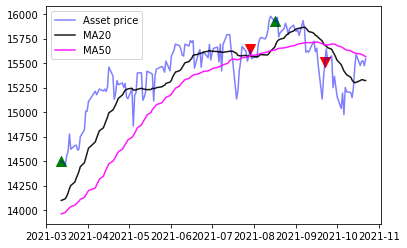

In [22]:
plt.plot(df['Adj Close'], label= 'Asset price', c='blue', alpha=0.5)
plt.plot(df['MA20'], label='MA20', c= 'k', alpha = 0.9)
plt.plot(df['MA50'], label='MA50', c='magenta', alpha = 0.9)
plt.scatter(df.iloc [Buy].index,df.iloc [Buy] ['Adj Close'],marker='^', color='g', s=100)
plt.scatter(df.iloc [Sell].index,df.iloc [Sell] ['Adj Close'],marker='v', color='r', s=100)
plt.legend()
plt.show()